# This is the script to extract Liver bounding!

In [2]:
import os
import nibabel as nib
len(os.listdir('../../Data/CT_Phase/Task_502_Phase_Data/'))
#len(os.listdir('../../Data/CT_Phase/Full_Image_Liver_07075/'))

263

In [29]:
import os
import nibabel as nib
import numpy as np
import skimage 
import matplotlib.pyplot as plt
from tqdm import tqdm
import SimpleITK as sitk
import nibabel as nib
import math
#print(os.listdir('../../Test_Data/Test_3D/'))
class ImageLoad:
    def __init__(self,input_path):
        """
        The path should only contain images
        """
        self.input_path = input_path


        #self.images_names = os.listdir('../../Test_Data/Test_3D/')
        self.images_names = os.listdir(self.input_path)
        self.images_num = len(self.images_names)
        self.image_path = [self.input_path + name for name in self.images_names]

    def image_load(self,image_path,reader='nib'):
        if reader == 'nib':
            return nib.load(image_path)
        elif reader == 'sitk':
            return sitk.ReadImage(image_path)
        else:
            raise ValueError("The reader should be either nib or sitk!")
        
    #def image_get_float(self):

  


class LiverBoundingBox:
    def __init__(self,liver_mask,liver_orig,out_path_box=None,file_name=None):
        """
        args:
            liver_mask: the liver mask|nib or sitk
            original_image: the original image|nib or sitk
        """
        self.liver_seg = liver_mask
        self.liver_orig = liver_orig
        self.out_path_box = out_path_box
        self.file_name = file_name
        # self.original_image = original_image
        # self.liver_mask_array = self._get_array(liver_seg)
        # self.original_arrary = self._get_array(original_image)
        # self.image_loader = image_loader
    def extract_liver(self,liver=True):
        """
            get either the liver or tumor region from the mask
            args:
                mask: mask of the liver and tumor
                liver: if True return the liver region, if False return the tumor region
        """
        mask = self._get_array(self.liver_seg)
        mask = mask.astype(int)
        print(mask.shape)
        
        if liver:
            mask[mask == 2] = 1
        else:
            mask[mask == 1] = 0
            mask[mask == 2] = 1
            mask = mask.astype(int)
            
        # only keep the largest connected component
        labeled = skimage.measure.label(mask, connectivity=2)

        labeled[labeled != 1] = 0
      
        mask = labeled
        print(mask.sum())

        return mask


        
    def get_liver_bounding_box(self,liver_mask):
        '''
    Function to generate bounding box for liver, from a binary liver mask
        args:
            liver_mask: binary mask of the liver

        returns:
            bbox: bounding box of the liver (min_row, min_col, min_slice, max_row, max_col, max_slice = bbox)
        '''

        # get the image_probs
        image_probs = skimage.measure.regionprops((liver_mask))

        # get the bounding box of the liver

        if len(image_probs) == 0:
            print(f'[WARNING] no liver found')
            self._recording_failing()
            return None

        ## find the adjacent box that contains the liver
        for props in image_probs:
            bbox = props.bbox
            min_row, min_col, min_slice, max_row, max_col, max_slice = bbox 
            print("this is range",min_row, min_col, min_slice, max_row, max_col, max_slice)
        return [min_row, min_col, min_slice, max_row, max_col, max_slice]

    def crop_scan(self,liver_bounding):
        """
        Crop the scan with the bounding box
        args:
            liver_bounding: the bounding box of the liver
        """
        liver_original = self._get_array(self.liver_orig)
        # get the bounding box of the liver
        min_row, min_col, min_slice, max_row, max_col, max_slice = list(map(self._check_range,liver_bounding))
        print('this is after check range',min_row, min_col, min_slice, max_row, max_col, max_slice)
        
        #crop the scan
        cropped_scan = liver_original[min_row:max_row,min_col:max_col,min_slice:max_slice]
        return cropped_scan
    
    def store_cropped_data(self,cropped_data):

        if not os.path.exists(self.out_path_box):
            os.mkdir(self.out_path_box)
            print('The path does not exist, create the path!')

        header = self.liver_orig.header
        affine = self.liver_orig.affine
        print("this is shape of cropped data",cropped_data.shape)
        cropped_image = nib.Nifti1Image(cropped_data, affine, header)


        
        nib.save(cropped_image, self.out_path_box + self.file_name)

    @staticmethod   
    def liver_detection(mask):
        if np.count_nonzero(mask) != 0:
            return True


    def _check_range(self,range_num):
        return max(0,range_num)
    
    def _get_array(self,image_file):
        return image_file.get_fdata()
    
    def _recording_failing(self):
        with open(self.out_path_box + 'failing_box.txt','a') as f:
            f.write(self.file_name + '\n')








NameError: name 'os' is not defined

In [12]:
image_lst = os.listdir('../../Data/CT_Phase/Full_Image_Liver_07075/')
image_liver_slice = {img:() for img in image_lst}

{'CILM_CT_101040_0000.nii.gz': (),
 'CILM_CT_102030_0000.nii.gz': (),
 'CILM_CT_104550_0000.nii.gz': (),
 'CILM_CT_104551_0000.nii.gz': (),
 'CILM_CT_104552_0000.nii.gz': (),
 'CILM_CT_107850_0000.nii.gz': (),
 'CILM_CT_107851_0000.nii.gz': (),
 'CILM_CT_111110_0000.nii.gz': (),
 'CILM_CT_111111_0000.nii.gz': (),
 'CILM_CT_111112_0000.nii.gz': (),
 'CILM_CT_111550_0000.nii.gz': (),
 'CILM_CT_111551_0000.nii.gz': (),
 'CILM_CT_111552_0000.nii.gz': (),
 'CILM_CT_111553_0000.nii.gz': (),
 'CILM_CT_114470_0000.nii.gz': (),
 'CILM_CT_114471_0000.nii.gz': (),
 'CILM_CT_114472_0000.nii.gz': (),
 'CILM_CT_116560_0000.nii.gz': (),
 'CILM_CT_116561_0000.nii.gz': (),
 'CILM_CT_121900_0000.nii.gz': (),
 'CILM_CT_121901_0000.nii.gz': (),
 'CILM_CT_125530_0000.nii.gz': (),
 'CILM_CT_125531_0000.nii.gz': (),
 'CILM_CT_125532_0000.nii.gz': (),
 'CILM_CT_129310_0000.nii.gz': (),
 'CILM_CT_129311_0000.nii.gz': (),
 'CILM_CT_129570_0000.nii.gz': (),
 'CILM_CT_134190_0000.nii.gz': (),
 'CILM_CT_134191_000

In [70]:
cropped_out_path = '../../Data/CT_Phase/Full_image_Liver_slice_07075'
#load the images
image_orig_load = ImageLoad("../../Data/CT_Phase/Full_Image_Liver/")
image_seg_load = ImageLoad("../../Data/CT_Phase/Task_502_Phase_Data/")
for i in range(image_orig_load.images_num):
    file_name = image_orig_load.images_names[i]
    image_orign,image_segg = image_orig_load.image_load(image_orig_load.image_path[i]),image_seg_load.image_load(image_seg_load.image_path[i])

    #finding bounding box
    liver_bbox = LiverBoundingBox(image_segg,image_orign,cropped_out_path,file_name)
    liver_mask = liver_bbox.extract_liver()
    if liver_bbox.liver_detection(liver_mask):
        liver_box_range = liver_bbox.get_liver_bounding_box(liver_mask)
        image_liver_slice[file_name] = liver_box_range
        
    else:
        liver_bbox._recording_failing()

(512, 512, 112)
834018
this is range 61 143 72 330 424 111
(512, 512, 56)
753106
this is range 43 146 19 348 416 54
(512, 512, 37)
204600
this is range 92 176 7 293 383 35
(512, 512, 61)
907715
this is range 94 169 2 416 387 58
(512, 512, 79)
598292
this is range 87 166 42 433 387 77
(512, 512, 59)
226024
this is range 103 178 0 387 368 12
(512, 512, 127)
470047
this is range 101 177 48 380 372 79
(512, 512, 48)
951642
this is range 46 140 5 387 419 43
(512, 512, 42)
789539
this is range 30 143 0 376 400 36
(512, 512, 48)
890230
this is range 40 176 5 387 414 43
(512, 512, 34)
492336
this is range 44 133 1 319 374 32
(512, 512, 60)
570101
this is range 27 114 0 341 384 15
(512, 512, 113)
2087630
this is range 43 127 6 332 376 108
(512, 512, 125)
657710
this is range 43 125 49 328 374 80
(512, 512, 142)
783531
this is range 60 144 85 325 386 140
(512, 512, 65)
741745
this is range 62 142 8 321 384 62
(512, 512, 142)
776687
this is range 59 140 86 322 383 141
(512, 512, 38)
447880
this i

-80.23564331067803

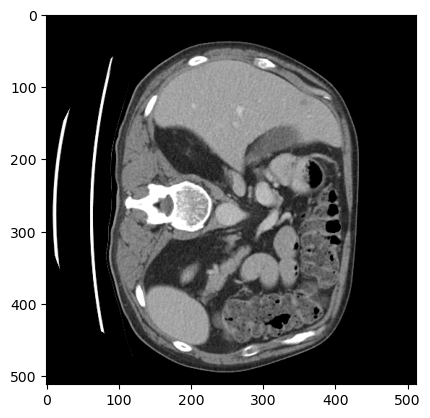

In [10]:
image_liver_slice = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_07075_window/CILM_CT_101040_0000.nii.gz')
image_liver_slice = image_liver_slice.get_fdata()
import matplotlib.pyplot as plt
plt.imshow(image_liver_slice[:,:,30],cmap='gray')

image_liver_slice[:,:,1].mean()

In [61]:
def save_liver_slice(image_path,image_name,cropped_out_path,slice_margin=0):
    """
    args:
        image_path: the path of the image
        image_name: the name of the image
        slice_margin: the margin of the slice
    """
    image = nib.load(image_path)
    image_data = image.get_fdata()
    image_shape = image_data.shape
    print(image_shape,666)
    min_row, min_col, min_slice, max_row, max_col, max_slice = image_liver_slice[image_name]
    print('min and max slice',min_slice,max_slice)
    min_slice = max(0,math.floor(min_slice - min_slice*slice_margin))
    print('fucking max slice',max_slice)
    max_slice = min(image_shape[2],math.ceil(max_slice + max_slice* slice_margin))
    print("fucking after",max_slice)
    print(min_slice,max_slice)
    image_data = image_data[:,:,min_slice:max_slice]
    print(image_data.shape)
    image = nib.Nifti1Image(image_data, image.affine, image.header)
    nib.save(image, cropped_out_path + '/' + image_name)
    print('saved!')

In [69]:
image_orign = nib.load('../../Data/CT_Phase/Full_Image_Liver_07075/CILM_CT_101040_0000.nii.gz')
image_orign.shape

(521, 521, 112)

In [71]:
import matplotlib.pyplot as plt
image_path = '../../Data/CT_Phase/Full_Image_Liver_07075/CILM_CT_101040_0000.nii.gz'
image_name = 'CILM_CT_101040_0000.nii.gz'
cropped_out_path = '../../Data/CT_Phase/Full_image_Liver_slice_07075'

os.makedirs(cropped_out_path,exist_ok=True)
save_liver_slice(image_path,image_name,cropped_out_path,slice_margin=0.2)


#save all slice that includes liver
for i in tqdm(range(image_orig_load.images_num)):
    file_name = image_orig_load.images_names[i]
    image_path = image_orig_load.image_path[i]
    save_liver_slice(image_path,file_name,cropped_out_path,slice_margin=0.2)



(521, 521, 112) 666
min and max slice 72 111
fucking max slice 111
fucking after 112
57 112
(521, 521, 55)
saved!


  0%|          | 0/263 [00:00<?, ?it/s]

(512, 512, 112) 666
min and max slice 72 111
fucking max slice 111
fucking after 112
57 112
(512, 512, 55)


  0%|          | 1/263 [00:00<03:41,  1.18it/s]

saved!
(512, 512, 56) 666
min and max slice 19 54
fucking max slice 54
fucking after 56
15 56
(512, 512, 41)


  1%|          | 2/263 [00:01<03:01,  1.43it/s]

saved!
(512, 512, 37) 666
min and max slice 7 35
fucking max slice 35
fucking after 37
5 37
(512, 512, 32)


  1%|          | 3/263 [00:01<02:28,  1.75it/s]

saved!
(512, 512, 61) 666
min and max slice 2 58
fucking max slice 58
fucking after 61
1 61
(512, 512, 60)


  2%|▏         | 4/263 [00:02<02:50,  1.52it/s]

saved!
(512, 512, 79) 666
min and max slice 42 77
fucking max slice 77
fucking after 79
33 79
(512, 512, 46)


  2%|▏         | 5/263 [00:03<02:53,  1.49it/s]

saved!
(512, 512, 59) 666
min and max slice 0 12
fucking max slice 12
fucking after 15
0 15
(512, 512, 15)


  2%|▏         | 6/263 [00:03<02:24,  1.78it/s]

saved!
(512, 512, 127) 666
min and max slice 48 79
fucking max slice 79
fucking after 95
38 95
(512, 512, 57)


  3%|▎         | 7/263 [00:04<02:50,  1.50it/s]

saved!
(512, 512, 48) 666
min and max slice 5 43
fucking max slice 43
fucking after 48
4 48
(512, 512, 44)


  3%|▎         | 8/263 [00:05<02:48,  1.51it/s]

saved!
(512, 512, 42) 666
min and max slice 0 36
fucking max slice 36
fucking after 42
0 42
(512, 512, 42)


  3%|▎         | 9/263 [00:05<02:41,  1.57it/s]

saved!
(512, 512, 48) 666
min and max slice 5 43
fucking max slice 43
fucking after 48
4 48
(512, 512, 44)


  4%|▍         | 10/263 [00:06<02:39,  1.58it/s]

saved!
(512, 512, 34) 666
min and max slice 1 32
fucking max slice 32
fucking after 34
0 34
(512, 512, 34)


  4%|▍         | 11/263 [00:06<02:26,  1.73it/s]

saved!
(512, 512, 60) 666
min and max slice 0 15
fucking max slice 15
fucking after 18
0 18
(512, 512, 18)


  5%|▍         | 12/263 [00:07<02:21,  1.78it/s]

saved!
(512, 512, 113) 666
min and max slice 6 108
fucking max slice 108
fucking after 113
4 113
(512, 512, 109)


  5%|▍         | 13/263 [00:08<03:27,  1.20it/s]

saved!
(512, 512, 125) 666
min and max slice 49 80
fucking max slice 80
fucking after 96
39 96
(512, 512, 57)


  5%|▌         | 14/263 [00:09<03:42,  1.12it/s]

saved!
(512, 512, 142) 666
min and max slice 85 140
fucking max slice 140
fucking after 142
68 142
(512, 512, 74)


  6%|▌         | 15/263 [00:11<03:58,  1.04it/s]

saved!
(512, 512, 65) 666
min and max slice 8 62
fucking max slice 62
fucking after 65
6 65
(512, 512, 59)


  6%|▌         | 16/263 [00:11<03:41,  1.12it/s]

saved!
(512, 512, 142) 666
min and max slice 86 141
fucking max slice 141
fucking after 142
68 142
(512, 512, 74)


  6%|▋         | 17/263 [00:12<03:54,  1.05it/s]

saved!
(512, 512, 38) 666
min and max slice 8 36
fucking max slice 36
fucking after 38
6 38
(512, 512, 32)


  7%|▋         | 18/263 [00:13<03:15,  1.26it/s]

saved!
(512, 512, 38) 666
min and max slice 7 36
fucking max slice 36
fucking after 38
5 38
(512, 512, 33)


  7%|▋         | 19/263 [00:13<02:49,  1.44it/s]

saved!
(512, 512, 130) 666
min and max slice 96 126
fucking max slice 126
fucking after 130
76 130
(512, 512, 54)


  8%|▊         | 20/263 [00:14<03:04,  1.32it/s]

saved!
(512, 512, 130) 666
min and max slice 96 126
fucking max slice 126
fucking after 130
76 130
(512, 512, 54)


  8%|▊         | 21/263 [00:15<03:11,  1.26it/s]

saved!
(512, 512, 60) 666
min and max slice 11 53
fucking max slice 53
fucking after 60
8 60
(512, 512, 52)


  8%|▊         | 22/263 [00:16<03:06,  1.29it/s]

saved!
(512, 512, 60) 666
min and max slice 11 52
fucking max slice 52
fucking after 60
8 60
(512, 512, 52)


  9%|▊         | 23/263 [00:16<03:00,  1.33it/s]

saved!
(512, 512, 60) 666
min and max slice 12 54
fucking max slice 54
fucking after 60
9 60
(512, 512, 51)


  9%|▉         | 24/263 [00:17<02:56,  1.35it/s]

saved!
(512, 512, 93) 666
min and max slice 59 89
fucking max slice 89
fucking after 93
47 93
(512, 512, 46)


 10%|▉         | 25/263 [00:18<02:59,  1.33it/s]

saved!
(512, 512, 86) 666
min and max slice 31 82
fucking max slice 82
fucking after 86
24 86
(512, 512, 62)


 10%|▉         | 26/263 [00:19<03:12,  1.23it/s]

saved!
(512, 512, 192) 666
min and max slice 24 183
fucking max slice 183
fucking after 192
19 192
(512, 512, 173)


 10%|█         | 27/263 [00:21<04:44,  1.21s/it]

saved!
(512, 512, 42) 666
min and max slice 6 40
fucking max slice 40
fucking after 42
4 42
(512, 512, 38)


 11%|█         | 28/263 [00:22<03:58,  1.01s/it]

saved!
(512, 512, 42) 666
min and max slice 7 40
fucking max slice 40
fucking after 42
5 42
(512, 512, 37)


 11%|█         | 29/263 [00:22<03:22,  1.16it/s]

saved!
(512, 512, 42) 666
min and max slice 6 40
fucking max slice 40
fucking after 42
4 42
(512, 512, 38)


 11%|█▏        | 30/263 [00:23<02:58,  1.30it/s]

saved!
(512, 512, 42) 666
min and max slice 7 40
fucking max slice 40
fucking after 42
5 42
(512, 512, 37)


 12%|█▏        | 31/263 [00:23<02:39,  1.46it/s]

saved!
(512, 512, 224) 666
min and max slice 103 164
fucking max slice 164
fucking after 197
82 197
(512, 512, 115)


 12%|█▏        | 32/263 [00:25<03:40,  1.05it/s]

saved!
(512, 512, 87) 666
min and max slice 37 86
fucking max slice 86
fucking after 87
29 87
(512, 512, 58)


 13%|█▎        | 33/263 [00:26<03:27,  1.11it/s]

saved!
(512, 512, 164) 666
min and max slice 102 163
fucking max slice 163
fucking after 164
81 164
(512, 512, 83)


 13%|█▎        | 34/263 [00:27<03:45,  1.02it/s]

saved!
(512, 512, 121) 666
min and max slice 49 82
fucking max slice 82
fucking after 99
39 99
(512, 512, 60)


 13%|█▎        | 35/263 [00:28<03:43,  1.02it/s]

saved!
(512, 512, 34) 666
min and max slice 1 34
fucking max slice 34
fucking after 34
0 34
(512, 512, 34)


 14%|█▎        | 36/263 [00:28<03:08,  1.20it/s]

saved!
(512, 512, 54) 666
min and max slice 0 15
fucking max slice 15
fucking after 18
0 18
(512, 512, 18)


 14%|█▍        | 37/263 [00:29<02:41,  1.40it/s]

saved!
(512, 512, 35) 666
min and max slice 17 33
fucking max slice 33
fucking after 35
13 35
(512, 512, 22)


 14%|█▍        | 38/263 [00:29<02:16,  1.64it/s]

saved!
(512, 512, 32) 666
min and max slice 1 26
fucking max slice 26
fucking after 32
0 32
(512, 512, 32)


 15%|█▍        | 39/263 [00:29<02:03,  1.82it/s]

saved!
(512, 512, 75) 666
min and max slice 1 27
fucking max slice 27
fucking after 33
0 33
(512, 512, 33)


 15%|█▌        | 40/263 [00:30<02:03,  1.80it/s]

saved!
(512, 512, 75) 666
min and max slice 44 72
fucking max slice 72
fucking after 75
35 75
(512, 512, 40)


 16%|█▌        | 41/263 [00:31<02:08,  1.73it/s]

saved!
(512, 512, 151) 666
min and max slice 96 145
fucking max slice 145
fucking after 151
76 151
(512, 512, 75)


 16%|█▌        | 42/263 [00:32<02:40,  1.38it/s]

saved!
(512, 512, 218) 666
min and max slice 97 144
fucking max slice 144
fucking after 173
77 173
(512, 512, 96)


 16%|█▋        | 43/263 [00:33<03:28,  1.05it/s]

saved!
(512, 512, 40) 666
min and max slice 16 36
fucking max slice 36
fucking after 40
12 40
(512, 512, 28)


 17%|█▋        | 44/263 [00:34<02:53,  1.26it/s]

saved!
(512, 512, 37) 666
min and max slice 4 34
fucking max slice 34
fucking after 37
3 37
(512, 512, 34)


 17%|█▋        | 45/263 [00:34<02:32,  1.43it/s]

saved!
(512, 512, 58) 666
min and max slice 0 11
fucking max slice 11
fucking after 14
0 14
(512, 512, 14)


 17%|█▋        | 46/263 [00:34<02:10,  1.66it/s]

saved!
(512, 512, 120) 666
min and max slice 43 73
fucking max slice 73
fucking after 88
34 88
(512, 512, 54)


 18%|█▊        | 47/263 [00:35<02:32,  1.42it/s]

saved!
(512, 512, 79) 666
min and max slice 17 71
fucking max slice 71
fucking after 79
13 79
(512, 512, 66)


 18%|█▊        | 48/263 [00:36<02:45,  1.30it/s]

saved!
(512, 512, 79) 666
min and max slice 18 73
fucking max slice 73
fucking after 79
14 79
(512, 512, 65)


 19%|█▊        | 49/263 [00:37<02:55,  1.22it/s]

saved!
(512, 512, 151) 666
min and max slice 0 55
fucking max slice 55
fucking after 66
0 66
(512, 512, 66)


 19%|█▉        | 50/263 [00:38<03:14,  1.10it/s]

saved!
(512, 512, 334) 666
min and max slice 117 238
fucking max slice 238
fucking after 286
93 286
(512, 512, 193)


 19%|█▉        | 51/263 [00:41<05:04,  1.44s/it]

saved!
(512, 512, 50) 666
min and max slice 9 46
fucking max slice 46
fucking after 50
7 50
(512, 512, 43)


 20%|█▉        | 52/263 [00:42<04:17,  1.22s/it]

saved!
(512, 512, 86) 666
min and max slice 5 39
fucking max slice 39
fucking after 47
4 47
(512, 512, 43)


 20%|██        | 53/263 [00:42<03:45,  1.07s/it]

saved!
(512, 512, 62) 666
min and max slice 0 15
fucking max slice 15
fucking after 18
0 18
(512, 512, 18)


 21%|██        | 54/263 [00:43<03:06,  1.12it/s]

saved!
(512, 512, 46) 666
min and max slice 7 39
fucking max slice 39
fucking after 46
5 46
(512, 512, 41)


 21%|██        | 55/263 [00:43<02:44,  1.26it/s]

saved!
(512, 512, 45) 666
min and max slice 5 38
fucking max slice 38
fucking after 45
4 45
(512, 512, 41)


 21%|██▏       | 56/263 [00:44<02:30,  1.38it/s]

saved!
(512, 512, 63) 666
min and max slice 0 23
fucking max slice 23
fucking after 28
0 28
(512, 512, 28)


 22%|██▏       | 57/263 [00:44<02:14,  1.54it/s]

saved!
(512, 512, 131) 666
min and max slice 63 91
fucking max slice 91
fucking after 110
50 110
(512, 512, 60)


 22%|██▏       | 58/263 [00:45<02:29,  1.37it/s]

saved!
(512, 512, 45) 666
min and max slice 14 44
fucking max slice 44
fucking after 45
11 45
(512, 512, 34)


 22%|██▏       | 59/263 [00:46<02:16,  1.50it/s]

saved!
(512, 512, 45) 666
min and max slice 5 45
fucking max slice 45
fucking after 45
4 45
(512, 512, 41)


 23%|██▎       | 60/263 [00:46<02:07,  1.59it/s]

saved!
(512, 512, 87) 666
min and max slice 48 87
fucking max slice 87
fucking after 87
38 87
(512, 512, 49)


 23%|██▎       | 61/263 [00:47<02:16,  1.48it/s]

saved!
(512, 512, 45) 666
min and max slice 5 45
fucking max slice 45
fucking after 45
4 45
(512, 512, 41)


 24%|██▎       | 62/263 [00:48<02:09,  1.55it/s]

saved!
(512, 512, 73) 666
min and max slice 44 72
fucking max slice 72
fucking after 73
35 73
(512, 512, 38)


 24%|██▍       | 63/263 [00:48<02:07,  1.57it/s]

saved!
(512, 512, 37) 666
min and max slice 7 36
fucking max slice 36
fucking after 37
5 37
(512, 512, 32)


 24%|██▍       | 64/263 [00:49<01:56,  1.71it/s]

saved!
(512, 512, 37) 666
min and max slice 7 35
fucking max slice 35
fucking after 37
5 37
(512, 512, 32)


 25%|██▍       | 65/263 [00:49<01:47,  1.85it/s]

saved!
(512, 512, 73) 666
min and max slice 44 73
fucking max slice 73
fucking after 73
35 73
(512, 512, 38)


 25%|██▌       | 66/263 [00:50<01:52,  1.76it/s]

saved!
(512, 512, 47) 666
min and max slice 15 45
fucking max slice 45
fucking after 47
12 47
(512, 512, 35)


 25%|██▌       | 67/263 [00:50<01:48,  1.81it/s]

saved!
(512, 512, 212) 666
min and max slice 87 137
fucking max slice 137
fucking after 165
69 165
(512, 512, 96)


 26%|██▌       | 68/263 [00:52<02:37,  1.24it/s]

saved!
(512, 512, 529) 666
min and max slice 333 528
fucking max slice 528
fucking after 529
266 529
(512, 512, 263)


 26%|██▌       | 69/263 [00:56<05:27,  1.69s/it]

saved!
(512, 512, 792) 666
min and max slice 325 513
fucking max slice 513
fucking after 616
260 616
(512, 512, 356)


 27%|██▋       | 70/263 [01:01<08:58,  2.79s/it]

saved!
(512, 512, 142) 666
min and max slice 90 141
fucking max slice 141
fucking after 142
72 142
(512, 512, 70)


 27%|██▋       | 71/263 [01:02<07:12,  2.25s/it]

saved!
(512, 512, 37) 666
min and max slice 4 35
fucking max slice 35
fucking after 37
3 37
(512, 512, 34)


 27%|██▋       | 72/263 [01:02<05:29,  1.73s/it]

saved!
(512, 512, 81) 666
min and max slice 6 38
fucking max slice 38
fucking after 46
4 46
(512, 512, 42)


 28%|██▊       | 73/263 [01:03<04:32,  1.44s/it]

saved!
(512, 512, 40) 666
min and max slice 5 37
fucking max slice 37
fucking after 40
4 40
(512, 512, 36)


 28%|██▊       | 74/263 [01:04<03:38,  1.15s/it]

saved!
(512, 512, 42) 666
min and max slice 7 38
fucking max slice 38
fucking after 42
5 42
(512, 512, 37)


 29%|██▊       | 75/263 [01:04<03:02,  1.03it/s]

saved!
(512, 512, 58) 666
min and max slice 0 15
fucking max slice 15
fucking after 18
0 18
(512, 512, 18)


 29%|██▉       | 76/263 [01:05<02:31,  1.23it/s]

saved!
(512, 512, 43) 666
min and max slice 7 40
fucking max slice 40
fucking after 43
5 43
(512, 512, 38)


 29%|██▉       | 77/263 [01:05<02:16,  1.36it/s]

saved!
(512, 512, 43) 666
min and max slice 7 40
fucking max slice 40
fucking after 43
5 43
(512, 512, 38)


 30%|██▉       | 78/263 [01:06<02:06,  1.46it/s]

saved!
(512, 512, 43) 666
min and max slice 7 40
fucking max slice 40
fucking after 43
5 43
(512, 512, 38)


 30%|███       | 79/263 [01:06<01:59,  1.54it/s]

saved!
(512, 512, 45) 666
min and max slice 4 39
fucking max slice 39
fucking after 45
3 45
(512, 512, 42)


 30%|███       | 80/263 [01:07<02:00,  1.51it/s]

saved!
(512, 512, 47) 666
min and max slice 17 43
fucking max slice 43
fucking after 47
13 47
(512, 512, 34)


 31%|███       | 81/263 [01:08<01:52,  1.62it/s]

saved!
(512, 512, 66) 666
min and max slice 0 23
fucking max slice 23
fucking after 28
0 28
(512, 512, 28)


 31%|███       | 82/263 [01:08<01:51,  1.63it/s]

saved!
(512, 512, 46) 666
min and max slice 7 41
fucking max slice 41
fucking after 46
5 46
(512, 512, 41)


 32%|███▏      | 83/263 [01:09<01:50,  1.63it/s]

saved!
(512, 512, 134) 666
min and max slice 57 91
fucking max slice 91
fucking after 110
45 110
(512, 512, 65)


 32%|███▏      | 84/263 [01:10<02:17,  1.30it/s]

saved!
(512, 512, 53) 666
min and max slice 20 48
fucking max slice 48
fucking after 53
16 53
(512, 512, 37)


 32%|███▏      | 85/263 [01:11<02:04,  1.43it/s]

saved!
(512, 512, 98) 666
min and max slice 50 94
fucking max slice 94
fucking after 98
40 98
(512, 512, 58)


 33%|███▎      | 86/263 [01:12<02:22,  1.24it/s]

saved!
(512, 512, 58) 666
min and max slice 10 51
fucking max slice 51
fucking after 58
8 58
(512, 512, 50)


 33%|███▎      | 87/263 [01:12<02:19,  1.26it/s]

saved!
(512, 512, 58) 666
min and max slice 10 54
fucking max slice 54
fucking after 58
8 58
(512, 512, 50)


 33%|███▎      | 88/263 [01:13<02:17,  1.27it/s]

saved!
(512, 512, 85) 666
min and max slice 2 38
fucking max slice 38
fucking after 46
1 46
(512, 512, 45)


 34%|███▍      | 89/263 [01:14<02:19,  1.24it/s]

saved!
(512, 512, 37) 666
min and max slice 16 36
fucking max slice 36
fucking after 37
12 37
(512, 512, 25)


 34%|███▍      | 90/263 [01:14<01:57,  1.48it/s]

saved!
(512, 512, 35) 666
min and max slice 0 33
fucking max slice 33
fucking after 35
0 35
(512, 512, 35)


 35%|███▍      | 91/263 [01:15<01:45,  1.64it/s]

saved!
(512, 512, 60) 666
min and max slice 0 13
fucking max slice 13
fucking after 16
0 16
(512, 512, 16)


 35%|███▍      | 92/263 [01:15<01:36,  1.78it/s]

saved!
(512, 512, 92) 666
min and max slice 53 87
fucking max slice 87
fucking after 92
42 92
(512, 512, 50)


 35%|███▌      | 93/263 [01:16<01:46,  1.60it/s]

saved!
(512, 512, 37) 666
min and max slice 3 35
fucking max slice 35
fucking after 37
2 37
(512, 512, 35)


 36%|███▌      | 94/263 [01:16<01:38,  1.71it/s]

saved!
(512, 512, 39) 666
min and max slice 5 36
fucking max slice 36
fucking after 39
4 39
(512, 512, 35)


 36%|███▌      | 95/263 [01:17<01:34,  1.77it/s]

saved!
(512, 512, 46) 666
min and max slice 8 40
fucking max slice 40
fucking after 46
6 46
(512, 512, 40)


 37%|███▋      | 96/263 [01:18<01:34,  1.77it/s]

saved!
(512, 512, 93) 666
min and max slice 46 88
fucking max slice 88
fucking after 93
36 93
(512, 512, 57)


 37%|███▋      | 97/263 [01:18<01:46,  1.56it/s]

saved!
(512, 512, 41) 666
min and max slice 6 40
fucking max slice 40
fucking after 41
4 41
(512, 512, 37)


 37%|███▋      | 98/263 [01:19<01:39,  1.66it/s]

saved!
(512, 512, 41) 666
min and max slice 5 39
fucking max slice 39
fucking after 41
4 41
(512, 512, 37)


 38%|███▊      | 99/263 [01:19<01:35,  1.71it/s]

saved!
(512, 512, 45) 666
min and max slice 9 41
fucking max slice 41
fucking after 45
7 45
(512, 512, 38)


 38%|███▊      | 100/263 [01:20<01:34,  1.72it/s]

saved!
(512, 512, 41) 666
min and max slice 6 39
fucking max slice 39
fucking after 41
4 41
(512, 512, 37)


 38%|███▊      | 101/263 [01:21<01:31,  1.77it/s]

saved!
(512, 512, 58) 666
min and max slice 0 19
fucking max slice 19
fucking after 23
0 23
(512, 512, 23)


 39%|███▉      | 102/263 [01:21<01:29,  1.80it/s]

saved!
(512, 512, 127) 666
min and max slice 55 88
fucking max slice 88
fucking after 106
44 106
(512, 512, 62)


 39%|███▉      | 103/263 [01:22<01:53,  1.41it/s]

saved!
(512, 512, 73) 666
min and max slice 9 70
fucking max slice 70
fucking after 73
7 73
(512, 512, 66)


 40%|███▉      | 104/263 [01:23<02:04,  1.28it/s]

saved!
(512, 512, 45) 666
min and max slice 4 39
fucking max slice 39
fucking after 45
3 45
(512, 512, 42)


 40%|███▉      | 105/263 [01:24<01:59,  1.32it/s]

saved!
(512, 512, 50) 666
min and max slice 19 48
fucking max slice 48
fucking after 50
15 50
(512, 512, 35)


 40%|████      | 106/263 [01:24<01:49,  1.44it/s]

saved!
(512, 512, 70) 666
min and max slice 39 70
fucking max slice 70
fucking after 70
31 70
(512, 512, 39)


 41%|████      | 107/263 [01:25<01:48,  1.44it/s]

saved!
(512, 512, 38) 666
min and max slice 8 38
fucking max slice 38
fucking after 38
6 38
(512, 512, 32)


 41%|████      | 108/263 [01:26<01:39,  1.56it/s]

saved!
(512, 512, 38) 666
min and max slice 8 38
fucking max slice 38
fucking after 38
6 38
(512, 512, 32)


 42%|████▏     | 110/263 [01:26<01:14,  2.06it/s]

saved!
(512, 512, 11) 666
min and max slice 0 11
fucking max slice 11
fucking after 11
0 11
(512, 512, 11)
saved!
(512, 512, 43) 666
min and max slice 4 38
fucking max slice 38
fucking after 43
3 43
(512, 512, 40)


 42%|████▏     | 111/263 [01:27<01:18,  1.93it/s]

saved!
(512, 512, 43) 666
min and max slice 4 39
fucking max slice 39
fucking after 43
3 43
(512, 512, 40)


 43%|████▎     | 112/263 [01:27<01:20,  1.87it/s]

saved!
(512, 512, 137) 666
min and max slice 83 131
fucking max slice 131
fucking after 137
66 137
(512, 512, 71)


 43%|████▎     | 113/263 [01:29<01:44,  1.43it/s]

saved!
(512, 512, 78) 666
min and max slice 24 72
fucking max slice 72
fucking after 78
19 78
(512, 512, 59)


 43%|████▎     | 114/263 [01:29<01:48,  1.37it/s]

saved!
(512, 512, 137) 666
min and max slice 83 131
fucking max slice 131
fucking after 137
66 137
(512, 512, 71)


 44%|████▎     | 115/263 [01:30<02:02,  1.21it/s]

saved!
(512, 512, 148) 666
min and max slice 48 136
fucking max slice 136
fucking after 148
38 148
(512, 512, 110)


 44%|████▍     | 116/263 [01:33<02:58,  1.21s/it]

saved!
(512, 512, 132) 666
min and max slice 67 97
fucking max slice 97
fucking after 117
53 117
(512, 512, 64)


 44%|████▍     | 117/263 [01:34<03:03,  1.26s/it]

saved!
(512, 512, 41) 666
min and max slice 11 38
fucking max slice 38
fucking after 41
8 41
(512, 512, 33)


 45%|████▍     | 118/263 [01:34<02:30,  1.04s/it]

saved!
(512, 512, 451) 666
min and max slice 230 331
fucking max slice 331
fucking after 398
184 398
(512, 512, 214)


 45%|████▌     | 119/263 [01:39<04:49,  2.01s/it]

saved!
(512, 512, 56) 666
min and max slice 0 21
fucking max slice 21
fucking after 26
0 26
(512, 512, 26)


 46%|████▌     | 120/263 [01:39<03:45,  1.58s/it]

saved!
(512, 512, 97) 666
min and max slice 10 49
fucking max slice 49
fucking after 59
8 59
(512, 512, 51)


 46%|████▌     | 121/263 [01:40<03:13,  1.36s/it]

saved!
(512, 512, 56) 666
min and max slice 8 46
fucking max slice 46
fucking after 56
6 56
(512, 512, 50)


 46%|████▋     | 122/263 [01:41<02:41,  1.15s/it]

saved!
(512, 512, 60) 666
min and max slice 0 12
fucking max slice 12
fucking after 15
0 15
(512, 512, 15)


 47%|████▋     | 123/263 [01:41<02:11,  1.06it/s]

saved!
(512, 512, 56) 666
min and max slice 9 47
fucking max slice 47
fucking after 56
7 56
(512, 512, 49)


 47%|████▋     | 124/263 [01:42<02:02,  1.13it/s]

saved!
(512, 512, 166) 666
min and max slice 25 154
fucking max slice 154
fucking after 166
20 166
(512, 512, 146)


 48%|████▊     | 125/263 [01:44<02:50,  1.23s/it]

saved!
(512, 512, 69) 666
min and max slice 19 63
fucking max slice 63
fucking after 69
15 69
(512, 512, 54)


 48%|████▊     | 126/263 [01:45<02:32,  1.11s/it]

saved!
(512, 512, 65) 666
min and max slice 14 60
fucking max slice 60
fucking after 65
11 65
(512, 512, 54)


 48%|████▊     | 127/263 [01:46<02:19,  1.02s/it]

saved!
(512, 512, 156) 666
min and max slice 94 146
fucking max slice 146
fucking after 156
75 156
(512, 512, 81)


 49%|████▊     | 128/263 [01:47<02:26,  1.08s/it]

saved!
(512, 512, 582) 666
min and max slice 345 544
fucking max slice 544
fucking after 582
276 582
(512, 512, 306)


 49%|████▉     | 129/263 [01:51<04:44,  2.13s/it]

saved!
(512, 512, 79) 666
min and max slice 16 69
fucking max slice 69
fucking after 79
12 79
(512, 512, 67)


 49%|████▉     | 130/263 [01:52<03:50,  1.73s/it]

saved!
(512, 512, 582) 666
min and max slice 349 545
fucking max slice 545
fucking after 582
279 582
(512, 512, 303)


 50%|████▉     | 131/263 [01:57<05:36,  2.55s/it]

saved!
(512, 512, 155) 666
min and max slice 11 62
fucking max slice 62
fucking after 75
8 75
(512, 512, 67)


 50%|█████     | 132/263 [01:58<04:35,  2.10s/it]

saved!
(512, 512, 148) 666
min and max slice 16 136
fucking max slice 136
fucking after 148
12 148
(512, 512, 136)


 51%|█████     | 133/263 [02:00<04:23,  2.03s/it]

saved!
(512, 512, 44) 666
min and max slice 2 38
fucking max slice 38
fucking after 44
1 44
(512, 512, 43)


 51%|█████     | 134/263 [02:00<03:25,  1.59s/it]

saved!
(512, 512, 122) 666
min and max slice 81 119
fucking max slice 119
fucking after 122
64 122
(512, 512, 58)


 51%|█████▏    | 135/263 [02:01<02:55,  1.37s/it]

saved!
(512, 512, 60) 666
min and max slice 17 55
fucking max slice 55
fucking after 60
13 60
(512, 512, 47)


 52%|█████▏    | 136/263 [02:02<02:24,  1.14s/it]

saved!
(512, 512, 60) 666
min and max slice 17 55
fucking max slice 55
fucking after 60
13 60
(512, 512, 47)


 52%|█████▏    | 137/263 [02:02<02:03,  1.02it/s]

saved!
(512, 512, 137) 666
min and max slice 0 59
fucking max slice 59
fucking after 71
0 71
(512, 512, 71)


 52%|█████▏    | 138/263 [02:03<02:02,  1.02it/s]

saved!
(512, 512, 305) 666
min and max slice 156 227
fucking max slice 227
fucking after 273
124 273
(512, 512, 149)


 53%|█████▎    | 139/263 [02:05<02:36,  1.26s/it]

saved!
(512, 512, 40) 666
min and max slice 18 39
fucking max slice 39
fucking after 40
14 40
(512, 512, 26)


 53%|█████▎    | 140/263 [02:06<02:03,  1.00s/it]

saved!
(512, 512, 75) 666
min and max slice 1 38
fucking max slice 38
fucking after 46
0 46
(512, 512, 46)


 54%|█████▎    | 141/263 [02:06<01:52,  1.09it/s]

saved!
(512, 512, 80) 666
min and max slice 41 79
fucking max slice 79
fucking after 80
32 80
(512, 512, 48)


 54%|█████▍    | 142/263 [02:07<01:45,  1.14it/s]

saved!
(512, 512, 40) 666
min and max slice 19 39
fucking max slice 39
fucking after 40
15 40
(512, 512, 25)


 54%|█████▍    | 143/263 [02:07<01:27,  1.36it/s]

saved!
(512, 512, 40) 666
min and max slice 4 40
fucking max slice 40
fucking after 40
3 40
(512, 512, 37)


 55%|█████▌    | 145/263 [02:08<01:00,  1.96it/s]

saved!
(512, 512, 10) 666
min and max slice 3 8
fucking max slice 8
fucking after 10
2 10
(512, 512, 8)
saved!


 56%|█████▌    | 146/263 [02:08<00:50,  2.33it/s]

(512, 512, 38) 666
min and max slice 35 37
fucking max slice 37
fucking after 38
28 38
(512, 512, 10)
saved!
(512, 512, 40) 666
min and max slice 6 39
fucking max slice 39
fucking after 40
4 40
(512, 512, 36)


 56%|█████▌    | 147/263 [02:09<00:52,  2.20it/s]

saved!
(512, 512, 42) 666
min and max slice 23 31
fucking max slice 31
fucking after 38
18 38
(512, 512, 20)


 56%|█████▋    | 148/263 [02:09<00:48,  2.39it/s]

saved!
(512, 512, 42) 666
min and max slice 6 38
fucking max slice 38
fucking after 42
4 42
(512, 512, 38)


 57%|█████▋    | 149/263 [02:10<00:49,  2.28it/s]

saved!
(512, 512, 65) 666
min and max slice 5 56
fucking max slice 56
fucking after 65
4 65
(512, 512, 61)


 57%|█████▋    | 150/263 [02:11<01:02,  1.80it/s]

saved!
(512, 512, 321) 666
min and max slice 20 279
fucking max slice 279
fucking after 321
16 321
(512, 512, 305)


 57%|█████▋    | 151/263 [02:15<03:05,  1.66s/it]

saved!
(512, 512, 401) 666
min and max slice 106 363
fucking max slice 363
fucking after 401
84 401
(512, 512, 317)


 58%|█████▊    | 152/263 [02:19<04:36,  2.49s/it]

saved!
(512, 512, 81) 666
min and max slice 22 73
fucking max slice 73
fucking after 81
17 81
(512, 512, 64)


 58%|█████▊    | 153/263 [02:20<03:43,  2.03s/it]

saved!
(512, 512, 401) 666
min and max slice 106 363
fucking max slice 363
fucking after 401
84 401
(512, 512, 317)


 59%|█████▊    | 154/263 [02:25<05:04,  2.79s/it]

saved!
(512, 512, 321) 666
min and max slice 20 279
fucking max slice 279
fucking after 321
16 321
(512, 512, 305)


 59%|█████▉    | 155/263 [02:29<05:47,  3.22s/it]

saved!
(512, 512, 37) 666
min and max slice 3 34
fucking max slice 34
fucking after 37
2 37
(512, 512, 35)


 59%|█████▉    | 156/263 [02:29<04:15,  2.39s/it]

saved!
(512, 512, 37) 666
min and max slice 3 34
fucking max slice 34
fucking after 37
2 37
(512, 512, 35)


 60%|█████▉    | 157/263 [02:30<03:12,  1.82s/it]

saved!
(512, 512, 113) 666
min and max slice 73 109
fucking max slice 109
fucking after 113
58 113
(512, 512, 55)


 60%|██████    | 158/263 [02:31<02:38,  1.51s/it]

saved!
(512, 512, 431) 666
min and max slice 262 415
fucking max slice 415
fucking after 431
209 431
(512, 512, 222)


 60%|██████    | 159/263 [02:34<03:34,  2.06s/it]

saved!
(512, 512, 87) 666
min and max slice 53 83
fucking max slice 83
fucking after 87
42 87
(512, 512, 45)


 61%|██████    | 160/263 [02:35<02:51,  1.67s/it]

saved!
(512, 512, 206) 666
min and max slice 34 187
fucking max slice 187
fucking after 206
27 206
(512, 512, 179)


 61%|██████    | 161/263 [02:37<03:15,  1.92s/it]

saved!
(512, 512, 42) 666
min and max slice 7 38
fucking max slice 38
fucking after 42
5 42
(512, 512, 37)


 62%|██████▏   | 162/263 [02:38<02:31,  1.50s/it]

saved!
(512, 512, 63) 666
min and max slice 10 55
fucking max slice 55
fucking after 63
8 63
(512, 512, 55)


 62%|██████▏   | 163/263 [02:39<02:12,  1.32s/it]

saved!
(512, 512, 311) 666
min and max slice 45 278
fucking max slice 278
fucking after 311
36 311
(512, 512, 275)


 62%|██████▏   | 164/263 [02:43<03:40,  2.23s/it]

saved!
(512, 512, 34) 666
min and max slice 2 31
fucking max slice 31
fucking after 34
1 34
(512, 512, 33)


 63%|██████▎   | 165/263 [02:44<02:48,  1.72s/it]

saved!
(512, 512, 34) 666
min and max slice 3 33
fucking max slice 33
fucking after 34
2 34
(512, 512, 32)


 63%|██████▎   | 166/263 [02:44<02:12,  1.36s/it]

saved!
(512, 512, 60) 666
min and max slice 0 16
fucking max slice 16
fucking after 20
0 20
(512, 512, 20)


 63%|██████▎   | 167/263 [02:45<01:45,  1.10s/it]

saved!
(512, 512, 78) 666
min and max slice 6 34
fucking max slice 34
fucking after 41
4 41
(512, 512, 37)


 64%|██████▍   | 168/263 [02:45<01:33,  1.01it/s]

saved!
(512, 512, 47) 666
min and max slice 19 42
fucking max slice 42
fucking after 47
15 47
(512, 512, 32)


 64%|██████▍   | 169/263 [02:46<01:18,  1.19it/s]

saved!
(512, 512, 35) 666
min and max slice 4 32
fucking max slice 32
fucking after 35
3 35
(512, 512, 32)


 65%|██████▍   | 170/263 [02:46<01:07,  1.39it/s]

saved!
(512, 512, 35) 666
min and max slice 3 31
fucking max slice 31
fucking after 35
2 35
(512, 512, 33)


 65%|██████▌   | 171/263 [02:47<00:59,  1.55it/s]

saved!
(512, 512, 88) 666
min and max slice 56 81
fucking max slice 81
fucking after 88
44 88
(512, 512, 44)


 65%|██████▌   | 172/263 [02:48<01:02,  1.45it/s]

saved!
(512, 512, 92) 666
min and max slice 16 88
fucking max slice 88
fucking after 92
12 92
(512, 512, 80)


 66%|██████▌   | 173/263 [02:49<01:15,  1.19it/s]

saved!
(512, 512, 65) 666
min and max slice 0 17
fucking max slice 17
fucking after 21
0 21
(512, 512, 21)


 66%|██████▌   | 174/263 [02:49<01:05,  1.36it/s]

saved!
(512, 512, 48) 666
min and max slice 5 41
fucking max slice 41
fucking after 48
4 48
(512, 512, 44)


 67%|██████▋   | 175/263 [02:50<01:01,  1.44it/s]

saved!
(512, 512, 137) 666
min and max slice 53 89
fucking max slice 89
fucking after 107
42 107
(512, 512, 65)


 67%|██████▋   | 176/263 [02:51<01:10,  1.23it/s]

saved!
(512, 512, 35) 666
min and max slice 2 32
fucking max slice 32
fucking after 35
1 35
(512, 512, 34)


 67%|██████▋   | 177/263 [02:51<01:00,  1.42it/s]

saved!
(512, 512, 35) 666
min and max slice 1 31
fucking max slice 31
fucking after 35
0 35
(512, 512, 35)


 68%|██████▊   | 178/263 [02:52<00:53,  1.58it/s]

saved!
(512, 512, 167) 666
min and max slice 51 155
fucking max slice 155
fucking after 167
40 167
(512, 512, 127)


 68%|██████▊   | 179/263 [02:54<01:22,  1.02it/s]

saved!
(512, 512, 47) 666
min and max slice 14 44
fucking max slice 44
fucking after 47
11 47
(512, 512, 36)


 68%|██████▊   | 180/263 [02:54<01:10,  1.18it/s]

saved!


 69%|██████▉   | 181/263 [02:55<00:59,  1.37it/s]

(512, 512, 71) 666
min and max slice 0 13
fucking max slice 13
fucking after 16
0 16
(512, 512, 16)
saved!
(512, 512, 46) 666
min and max slice 5 41
fucking max slice 41
fucking after 46
4 46
(512, 512, 42)


 69%|██████▉   | 182/263 [02:55<00:55,  1.47it/s]

saved!
(512, 512, 161) 666
min and max slice 71 103
fucking max slice 103
fucking after 124
56 124
(512, 512, 68)


 70%|██████▉   | 183/263 [02:56<01:06,  1.21it/s]

saved!
(512, 512, 53) 666
min and max slice 13 48
fucking max slice 48
fucking after 53
10 53
(512, 512, 43)


 70%|██████▉   | 184/263 [02:57<01:00,  1.30it/s]

saved!
(512, 512, 46) 666
min and max slice 6 40
fucking max slice 40
fucking after 46
4 46
(512, 512, 42)


 70%|███████   | 185/263 [02:57<00:54,  1.43it/s]

saved!
(512, 512, 41) 666
min and max slice 5 37
fucking max slice 37
fucking after 41
4 41
(512, 512, 37)


 71%|███████   | 186/263 [02:58<00:49,  1.55it/s]

saved!
(512, 512, 41) 666
min and max slice 6 38
fucking max slice 38
fucking after 41
4 41
(512, 512, 37)


 71%|███████   | 187/263 [02:59<00:46,  1.64it/s]

saved!
(512, 512, 40) 666
min and max slice 5 37
fucking max slice 37
fucking after 40
4 40
(512, 512, 36)


 71%|███████▏  | 188/263 [02:59<00:43,  1.71it/s]

saved!
(512, 512, 54) 666
min and max slice 0 22
fucking max slice 22
fucking after 27
0 27
(512, 512, 27)


 72%|███████▏  | 189/263 [02:59<00:39,  1.86it/s]

saved!
(512, 512, 120) 666
min and max slice 60 88
fucking max slice 88
fucking after 106
48 106
(512, 512, 58)


 72%|███████▏  | 190/263 [03:00<00:46,  1.58it/s]

saved!
(512, 512, 39) 666
min and max slice 2 35
fucking max slice 35
fucking after 39
1 39
(512, 512, 38)


 73%|███████▎  | 191/263 [03:01<00:41,  1.72it/s]

saved!
(512, 512, 42) 666
min and max slice 3 34
fucking max slice 34
fucking after 41
2 41
(512, 512, 39)


 73%|███████▎  | 192/263 [03:01<00:39,  1.79it/s]

saved!
(512, 512, 44) 666
min and max slice 13 42
fucking max slice 42
fucking after 44
10 44
(512, 512, 34)


 73%|███████▎  | 193/263 [03:02<00:37,  1.86it/s]

saved!
(512, 512, 118) 666
min and max slice 38 109
fucking max slice 109
fucking after 118
30 118
(512, 512, 88)


 74%|███████▍  | 194/263 [03:03<00:52,  1.31it/s]

saved!
(512, 512, 44) 666
min and max slice 13 42
fucking max slice 42
fucking after 44
10 44
(512, 512, 34)


 74%|███████▍  | 195/263 [03:04<00:47,  1.43it/s]

saved!
(512, 512, 119) 666
min and max slice 36 112
fucking max slice 112
fucking after 119
28 119
(512, 512, 91)


 75%|███████▍  | 196/263 [03:05<00:59,  1.13it/s]

saved!
(512, 512, 151) 666
min and max slice 94 145
fucking max slice 145
fucking after 151
75 151
(512, 512, 76)


 75%|███████▍  | 197/263 [03:06<01:01,  1.07it/s]

saved!
(512, 512, 152) 666
min and max slice 23 73
fucking max slice 73
fucking after 88
18 88
(512, 512, 70)


 75%|███████▌  | 198/263 [03:07<01:02,  1.04it/s]

saved!
(512, 512, 81) 666
min and max slice 56 68
fucking max slice 68
fucking after 81
44 81
(512, 512, 37)


 76%|███████▌  | 199/263 [03:08<00:53,  1.19it/s]

saved!
(512, 512, 217) 666
min and max slice 23 217
fucking max slice 217
fucking after 217
18 217
(512, 512, 199)


 76%|███████▌  | 200/263 [03:10<01:24,  1.34s/it]

saved!
(512, 512, 67) 666
min and max slice 2 67
fucking max slice 67
fucking after 67
1 67
(512, 512, 66)


 76%|███████▋  | 201/263 [03:11<01:14,  1.21s/it]

saved!
(512, 512, 334) 666
min and max slice 35 334
fucking max slice 334
fucking after 334
28 334
(512, 512, 306)


 77%|███████▋  | 202/263 [03:15<02:05,  2.06s/it]

saved!
(512, 512, 47) 666
min and max slice 6 38
fucking max slice 38
fucking after 46
4 46
(512, 512, 42)


 77%|███████▋  | 203/263 [03:16<01:36,  1.61s/it]

saved!
(512, 512, 91) 666
min and max slice 3 40
fucking max slice 40
fucking after 48
2 48
(512, 512, 46)


 78%|███████▊  | 204/263 [03:16<01:20,  1.37s/it]

saved!
(512, 512, 45) 666
min and max slice 5 41
fucking max slice 41
fucking after 45
4 45
(512, 512, 41)


 78%|███████▊  | 205/263 [03:17<01:05,  1.13s/it]

saved!
(512, 512, 46) 666
min and max slice 6 41
fucking max slice 41
fucking after 46
4 46
(512, 512, 42)


 78%|███████▊  | 206/263 [03:18<00:55,  1.03it/s]

saved!


 79%|███████▊  | 207/263 [03:18<00:43,  1.28it/s]

(512, 512, 58) 666
min and max slice 0 7
fucking max slice 7
fucking after 9
0 9
(512, 512, 9)
saved!
(512, 512, 72) 666
min and max slice 6 62
fucking max slice 62
fucking after 72
4 72
(512, 512, 68)


 79%|███████▉  | 208/263 [03:19<00:48,  1.13it/s]

saved!
(512, 512, 360) 666
min and max slice 29 311
fucking max slice 311
fucking after 360
23 360
(512, 512, 337)


 79%|███████▉  | 209/263 [03:25<02:13,  2.47s/it]

saved!
(512, 512, 52) 666
min and max slice 18 47
fucking max slice 47
fucking after 52
14 52
(512, 512, 38)


 80%|███████▉  | 210/263 [03:26<01:41,  1.91s/it]

saved!
(512, 512, 89) 666
min and max slice 9 84
fucking max slice 84
fucking after 89
7 89
(512, 512, 82)


 80%|████████  | 211/263 [03:27<01:27,  1.68s/it]

saved!
(512, 512, 94) 666
min and max slice 44 90
fucking max slice 90
fucking after 94
35 94
(512, 512, 59)


 81%|████████  | 212/263 [03:28<01:14,  1.45s/it]

saved!
(512, 512, 596) 666
min and max slice 313 565
fucking max slice 565
fucking after 596
250 596
(512, 512, 346)


 81%|████████  | 213/263 [03:33<02:09,  2.60s/it]

saved!
(512, 512, 159) 666
min and max slice 83 150
fucking max slice 150
fucking after 159
66 159
(512, 512, 93)


 81%|████████▏ | 214/263 [03:35<01:49,  2.24s/it]

saved!
(512, 512, 317) 666
min and max slice 98 187
fucking max slice 187
fucking after 225
78 225
(512, 512, 147)


 82%|████████▏ | 215/263 [03:37<01:50,  2.30s/it]

saved!
(512, 512, 171) 666
min and max slice 0 41
fucking max slice 41
fucking after 50
0 50
(512, 512, 50)


 82%|████████▏ | 216/263 [03:38<01:31,  1.94s/it]

saved!
(512, 512, 45) 666
min and max slice 7 41
fucking max slice 41
fucking after 45
5 45
(512, 512, 40)


 83%|████████▎ | 217/263 [03:39<01:11,  1.55s/it]

saved!
(512, 512, 42) 666
min and max slice 8 39
fucking max slice 39
fucking after 42
6 42
(512, 512, 36)


 83%|████████▎ | 218/263 [03:39<00:55,  1.24s/it]

saved!
(512, 512, 67) 666
min and max slice 0 18
fucking max slice 18
fucking after 22
0 22
(512, 512, 22)


 83%|████████▎ | 219/263 [03:40<00:44,  1.02s/it]

saved!
(512, 512, 130) 666
min and max slice 48 81
fucking max slice 81
fucking after 98
38 98
(512, 512, 60)


 84%|████████▎ | 220/263 [03:41<00:46,  1.08s/it]

saved!
(512, 512, 109) 666
min and max slice 3 46
fucking max slice 46
fucking after 56
2 56
(512, 512, 54)


 84%|████████▍ | 221/263 [03:42<00:48,  1.16s/it]

saved!
(512, 512, 109) 666
min and max slice 3 46
fucking max slice 46
fucking after 56
2 56
(512, 512, 54)


 84%|████████▍ | 222/263 [03:43<00:46,  1.14s/it]

saved!
(512, 512, 51) 666
min and max slice 3 46
fucking max slice 46
fucking after 51
2 51
(512, 512, 49)


 85%|████████▍ | 223/263 [03:44<00:40,  1.01s/it]

saved!
(512, 512, 52) 666
min and max slice 4 46
fucking max slice 46
fucking after 52
3 52
(512, 512, 49)


 85%|████████▌ | 224/263 [03:45<00:35,  1.10it/s]

saved!
(512, 512, 52) 666
min and max slice 2 44
fucking max slice 44
fucking after 52
1 52
(512, 512, 51)


 86%|████████▌ | 225/263 [03:46<00:32,  1.16it/s]

saved!
(512, 512, 39) 666
min and max slice 3 37
fucking max slice 37
fucking after 39
2 39
(512, 512, 37)


 86%|████████▌ | 226/263 [03:46<00:29,  1.25it/s]

saved!
(512, 512, 38) 666
min and max slice 5 36
fucking max slice 36
fucking after 38
4 38
(512, 512, 34)


 86%|████████▋ | 227/263 [03:47<00:25,  1.40it/s]

saved!
(512, 512, 39) 666
min and max slice 5 38
fucking max slice 38
fucking after 39
4 39
(512, 512, 35)


 87%|████████▋ | 228/263 [03:47<00:23,  1.47it/s]

saved!
(512, 512, 105) 666
min and max slice 40 68
fucking max slice 68
fucking after 82
32 82
(512, 512, 50)


 87%|████████▋ | 229/263 [03:48<00:26,  1.29it/s]

saved!
(512, 512, 51) 666
min and max slice 0 14
fucking max slice 14
fucking after 17
0 17
(512, 512, 17)


 87%|████████▋ | 230/263 [03:49<00:22,  1.47it/s]

saved!
(512, 512, 37) 666
min and max slice 16 33
fucking max slice 33
fucking after 37
12 37
(512, 512, 25)


 88%|████████▊ | 231/263 [03:49<00:19,  1.61it/s]

saved!
(512, 512, 348) 666
min and max slice 131 227
fucking max slice 227
fucking after 273
104 273
(512, 512, 169)


 88%|████████▊ | 232/263 [03:53<00:46,  1.51s/it]

saved!
(512, 512, 37) 666
min and max slice 6 33
fucking max slice 33
fucking after 37
4 37
(512, 512, 33)


 89%|████████▊ | 233/263 [03:53<00:36,  1.22s/it]

saved!
(512, 512, 175) 666
min and max slice 50 159
fucking max slice 159
fucking after 175
40 175
(512, 512, 135)


 89%|████████▉ | 234/263 [03:56<00:43,  1.49s/it]

saved!
(512, 512, 45) 666
min and max slice 17 43
fucking max slice 43
fucking after 45
13 45
(512, 512, 32)


 89%|████████▉ | 235/263 [03:56<00:33,  1.20s/it]

saved!
(512, 512, 159) 666
min and max slice 59 149
fucking max slice 149
fucking after 159
47 159
(512, 512, 112)


 90%|████████▉ | 236/263 [03:58<00:38,  1.41s/it]

saved!
(512, 512, 47) 666
min and max slice 6 44
fucking max slice 44
fucking after 47
4 47
(512, 512, 43)


 90%|█████████ | 237/263 [03:59<00:30,  1.19s/it]

saved!
(512, 512, 51) 666
min and max slice 9 48
fucking max slice 48
fucking after 51
7 51
(512, 512, 44)


 90%|█████████ | 238/263 [03:59<00:25,  1.03s/it]

saved!
(512, 512, 48) 666
min and max slice 5 44
fucking max slice 44
fucking after 48
4 48
(512, 512, 44)


 91%|█████████ | 239/263 [04:00<00:21,  1.09it/s]

saved!
(512, 512, 51) 666
min and max slice 8 47
fucking max slice 47
fucking after 51
6 51
(512, 512, 45)


 91%|█████████▏| 240/263 [04:01<00:20,  1.15it/s]

saved!
(512, 512, 41) 666
min and max slice 7 37
fucking max slice 37
fucking after 41
5 41
(512, 512, 36)


 92%|█████████▏| 241/263 [04:01<00:17,  1.25it/s]

saved!
(512, 512, 36) 666
min and max slice 4 32
fucking max slice 32
fucking after 36
3 36
(512, 512, 33)


 92%|█████████▏| 242/263 [04:02<00:15,  1.38it/s]

saved!
(512, 512, 36) 666
min and max slice 5 32
fucking max slice 32
fucking after 36
4 36
(512, 512, 32)


 92%|█████████▏| 243/263 [04:02<00:13,  1.53it/s]

saved!
(512, 512, 55) 666
min and max slice 12 50
fucking max slice 50
fucking after 55
9 55
(512, 512, 46)


 93%|█████████▎| 244/263 [04:03<00:13,  1.41it/s]

saved!
(512, 512, 58) 666
min and max slice 14 54
fucking max slice 54
fucking after 58
11 58
(512, 512, 47)


 93%|█████████▎| 245/263 [04:04<00:13,  1.35it/s]

saved!
(512, 512, 61) 666
min and max slice 18 55
fucking max slice 55
fucking after 61
14 61
(512, 512, 47)


 94%|█████████▎| 246/263 [04:05<00:12,  1.32it/s]

saved!
(512, 512, 58) 666
min and max slice 13 52
fucking max slice 52
fucking after 58
10 58
(512, 512, 48)


 94%|█████████▍| 247/263 [04:06<00:13,  1.20it/s]

saved!
(512, 512, 37) 666
min and max slice 4 35
fucking max slice 35
fucking after 37
3 37
(512, 512, 34)


 94%|█████████▍| 248/263 [04:06<00:11,  1.34it/s]

saved!
(512, 512, 37) 666
min and max slice 6 36
fucking max slice 36
fucking after 37
4 37
(512, 512, 33)


 95%|█████████▍| 249/263 [04:07<00:09,  1.45it/s]

saved!
(512, 512, 54) 666
min and max slice 0 14
fucking max slice 14
fucking after 17
0 17
(512, 512, 17)


 95%|█████████▌| 250/263 [04:07<00:08,  1.62it/s]

saved!
(512, 512, 77) 666
min and max slice 6 37
fucking max slice 37
fucking after 45
4 45
(512, 512, 41)


 95%|█████████▌| 251/263 [04:08<00:08,  1.47it/s]

saved!
(512, 512, 71) 666
min and max slice 13 61
fucking max slice 61
fucking after 71
10 71
(512, 512, 61)


 96%|█████████▌| 252/263 [04:09<00:08,  1.35it/s]

saved!
(512, 512, 158) 666
min and max slice 23 135
fucking max slice 135
fucking after 158
18 158
(512, 512, 140)


 96%|█████████▌| 253/263 [04:11<00:11,  1.14s/it]

saved!
(512, 512, 158) 666
min and max slice 21 127
fucking max slice 127
fucking after 153
16 153
(512, 512, 137)


 97%|█████████▋| 254/263 [04:13<00:12,  1.40s/it]

saved!
(512, 512, 44) 666
min and max slice 5 38
fucking max slice 38
fucking after 44
4 44
(512, 512, 40)


 97%|█████████▋| 255/263 [04:14<00:09,  1.16s/it]

saved!
(512, 512, 44) 666
min and max slice 4 36
fucking max slice 36
fucking after 44
3 44
(512, 512, 41)


 97%|█████████▋| 256/263 [04:14<00:06,  1.01it/s]

saved!
(512, 512, 37) 666
min and max slice 4 35
fucking max slice 35
fucking after 37
3 37
(512, 512, 34)


 98%|█████████▊| 257/263 [04:15<00:05,  1.20it/s]

saved!
(512, 512, 39) 666
min and max slice 3 32
fucking max slice 32
fucking after 39
2 39
(512, 512, 37)


 98%|█████████▊| 258/263 [04:15<00:03,  1.35it/s]

saved!
(512, 512, 38) 666
min and max slice 14 33
fucking max slice 33
fucking after 38
11 38
(512, 512, 27)


 98%|█████████▊| 259/263 [04:16<00:02,  1.57it/s]

saved!
(512, 512, 206) 666
min and max slice 71 191
fucking max slice 191
fucking after 206
56 206
(512, 512, 150)


 99%|█████████▉| 260/263 [04:18<00:03,  1.13s/it]

saved!
(512, 512, 67) 666
min and max slice 4 51
fucking max slice 51
fucking after 62
3 62
(512, 512, 59)


 99%|█████████▉| 261/263 [04:19<00:02,  1.10s/it]

saved!
(512, 512, 67) 666
min and max slice 4 51
fucking max slice 51
fucking after 62
3 62
(512, 512, 59)


100%|█████████▉| 262/263 [04:20<00:01,  1.08s/it]

saved!
(512, 512, 65) 666
min and max slice 10 55
fucking max slice 55
fucking after 65
8 65
(512, 512, 57)


100%|██████████| 263/263 [04:21<00:00,  1.01it/s]

saved!


In [48]:
img = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_07075/CILM_CT_246501_0000.nii.gz').get_fdata()
#plt.imshow(img[:,:,0],cmap='gray')

min and max slice 345 544
276 93
(539, 539, 0)
saved!


In [19]:
a.shape

(258, 288, 30)